In [1]:
import sys
sys.path.append('..')

import warnings
warnings.filterwarnings("ignore", ".*does not have many workers.*")
warnings.filterwarnings("ignore", ".*IProgress*")

import torch
if torch.cuda.is_available():
    print('using gpu')
    accelerator = 'gpu'
else:
  accelerator = None

using gpu


In [2]:
import pytorch_lightning as pl
from ct.model.ct_mnist import CT_MNIST
from ct.data.mnist import MNIST

mnist = MNIST(batch_size=256, root='../data')
model = CT_MNIST(expl_coeff=2.0)
trainer = pl.Trainer(max_epochs=10, val_check_interval=100, logger=None, accelerator=accelerator, devices=1)
trainer.fit(model=model, datamodule=mnist)
trainer.test(model=model, datamodule=mnist)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/conda/envs/dd2412/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:604: UserWarning: Checkpoint directory /home/monhart.jakub/dd2412-project/notebooks/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type           | Params
--------------------------------------------------
0 | model          | CT_MNIST_torch | 262 K 
1 | train_accuracy | BinaryAccuracy | 0     
2 | val_accuracy   | BinaryAccuracy | 0     
3 | test_accuracy  | BinaryAccuracy | 0     
--------------------------------------------------
262 K     Trainable params
0         Non-trainable params
262 K     Total params
1.049     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 259/259 [00:41<00:00,  6.23it/s, loss=0.119, train_expl_loss=0.0106, train_acc=0.954, val_expl_loss=0.00612, val_acc=0.989, val_loss=0.0519] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 259/259 [00:41<00:00,  6.23it/s, loss=0.119, train_expl_loss=0.0106, train_acc=0.954, val_expl_loss=0.00612, val_acc=0.989, val_loss=0.0519]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 40/40 [00:04<00:00,  8.26it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.991599977016449
      test_cls_loss         0.02733507752418518
     test_expl_loss        0.005748844239860773
        test_loss          0.038832761347293854
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_cls_loss': 0.02733507752418518,
  'test_expl_loss': 0.005748844239860773,
  'test_acc': 0.991599977016449,
  'test_loss': 0.038832761347293854}]

In [3]:
test = iter(mnist.test_dataloader())

In [ ]:
image, (target_class, target_concept) = next(test)
pred_class, attn = model.model(image)
attn = attn.detach().squeeze(2).mean(1) # Squeeze over patches and average over heads

In [50]:
import matplotlib.pyplot as plt
import matplotlib

def plot_prediction(idx=0):
  fig = plt.figure()
  gs = fig.add_gridspec(2,2)

  ax1 = fig.add_subplot(gs[:, 0])
  ax1.imshow(image[idx].permute(1, 2, 0))
  prediction2class = {0: 'odd', 1: 'even'}
  prediction = ((pred_class[idx]>0.0)*1).item()
  ax1.set(title='Prediction: ' + prediction2class[prediction], yticks=[], xticks=[])

  ax2 = fig.add_subplot(gs[0, 1])
  ax2.imshow(target_concept[idx].unsqueeze(0))
  ax2.set(title='target_concept', yticks=[], xticks=range(10))

  ax3 = fig.add_subplot(gs[1, 1])
  ax3.imshow(attn[idx].unsqueeze(0))
  ax3.set(title='pred_concept', yticks=[], xticks=range(10))

  plt.show()
  return fig

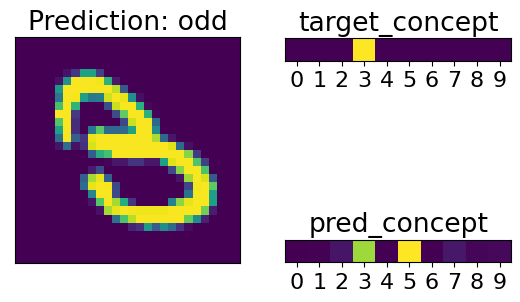

In [55]:
matplotlib.rcParams.update({'font.size': 16})
fig = plot_prediction(11)

In [56]:
fig.tight_layout()
fig.savefig('mnist2.pdf')

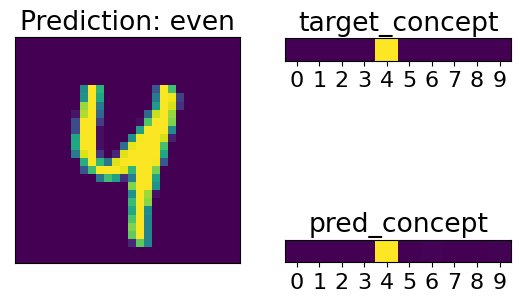

In [58]:
matplotlib.rcParams.update({'font.size': 16})
fig = plot_prediction(42)

In [59]:
fig.tight_layout()
fig.savefig('mnist1.pdf')